# 1) Modélisation en utilisant les séries temporelles

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# Chemin du fichier CSV
chemin_fichier = './base.csv'  # Remplacez par le chemin réel

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(chemin_fichier)

In [4]:
df.head()

,DATE,RR,TN,HTN,TX,HTX,TM,TMNX,DG,TAMPLI,...,HUN,UX,HUX,DHUMI40,DHUMI80,TSVM,UM,ETPGRILLE,NEIGETOTX,NEIGETOT06
0,2022-01-05,2.6,-0.4,1759.0,3.4,1217.0,0.9,1.50,389.0,3.8,...,1244.0,99.0,329.0,0.0,1157.0,5.7,88.0,0.4,0.0,0.0
1,2022-01-06,0.0,-2.5,1746.0,4.3,1327.0,-0.6,0.90,964.0,6.8,...,1032.0,99.0,2304.0,0.0,1043.0,5.1,88.0,0.6,0.0,0.0
2,2022-01-07,10.0,-6.9,718.0,1.6,2229.0,-1.2,-2.65,674.0,8.5,...,708.0,99.0,126.0,0.0,1440.0,5.4,96.0,0.0,0.0,0.0
3,2022-01-08,13.2,-0.7,733.0,6.3,2319.0,2.4,2.80,87.0,7.0,...,1403.0,99.0,618.0,0.0,1231.0,6.4,89.0,0.5,0.0,0.0
4,2022-01-09,7.6,0.4,737.0,2.2,601.0,1.8,1.30,0.0,1.8,...,3.0,98.0,745.0,0.0,1440.0,6.5,94.0,0.1,0.0,0.0


In [5]:
# Définir la colonne 'Date' comme index
df.set_index('DATE', inplace=True)

# Vérifier les 5 premières lignes
print(df.head())

# Vérifier le type de l'index
print(type(df.index))

              RR   TN     HTN   TX     HTX   TM  TMNX     DG  TAMPLI  TNTXM  \
DATE                                                                          
2022-01-05   2.6 -0.4  1759.0  3.4  1217.0  0.9  1.50  389.0     3.8    1.5   
2022-01-06   0.0 -2.5  1746.0  4.3  1327.0 -0.6  0.90  964.0     6.8    0.9   
2022-01-07  10.0 -6.9   718.0  1.6  2229.0 -1.2 -2.65  674.0     8.5   -2.7   
2022-01-08  13.2 -0.7   733.0  6.3  2319.0  2.4  2.80   87.0     7.0    2.8   
2022-01-09   7.6  0.4   737.0  2.2   601.0  1.8  1.30    0.0     1.8    1.3   

            ...     HUN    UX     HUX  DHUMI40  DHUMI80  TSVM    UM  \
DATE        ...                                                       
2022-01-05  ...  1244.0  99.0   329.0      0.0   1157.0   5.7  88.0   
2022-01-06  ...  1032.0  99.0  2304.0      0.0   1043.0   5.1  88.0   
2022-01-07  ...   708.0  99.0   126.0      0.0   1440.0   5.4  96.0   
2022-01-08  ...  1403.0  99.0   618.0      0.0   1231.0   6.4  89.0   
2022-01-09  ...     

In [6]:
# Initialiser le scaler
scaler = StandardScaler()

# Centrer et réduire toutes les colonnes (puisque toutes sont numériques)
df_standardise = pd.DataFrame(
    scaler.fit_transform(df), 
    index=df.index,  # Conserver l'index d'origine (DATE)
    columns=df.columns  # Conserver les noms des colonnes
)

# Afficher les premières lignes des données transformées
print(df_standardise.head())



                  RR        TN       HTN        TX       HTX        TM  \
DATE                                                                     
2022-01-05 -0.145556 -0.875833  1.400018 -1.730651 -0.406054 -1.480934   
2022-01-06 -0.510261 -1.193486  1.381189 -1.626404  0.071772 -1.689355   
2022-01-07  0.892453 -1.859045 -0.107733 -1.939145  3.989946 -1.772723   
2022-01-08  1.341321 -0.921212 -0.086008 -1.394744  4.380895 -1.272512   
2022-01-09  0.555801 -0.754822 -0.080214 -1.869647 -3.081881 -1.355881   

                TMNX        DG    TAMPLI     TNTXM  ...       HUN        UX  \
DATE                                                ...                       
2022-01-05 -1.464224  0.834364 -1.524584 -1.466111  ... -0.020220  0.423007   
2022-01-06 -1.549044  2.707071 -1.024689 -1.550864  ... -0.573653  0.423007   
2022-01-07 -2.050895  1.762575 -0.741414 -2.059388  ... -1.419465  0.423007   
2022-01-08 -1.280447 -0.149214 -0.991362 -1.282477  ...  0.394854  0.423007   
2022-01

## 1)Test de stationnarité

### a) Représentation de la variable cible

<Axes: xlabel='DATE', ylabel='TM'>

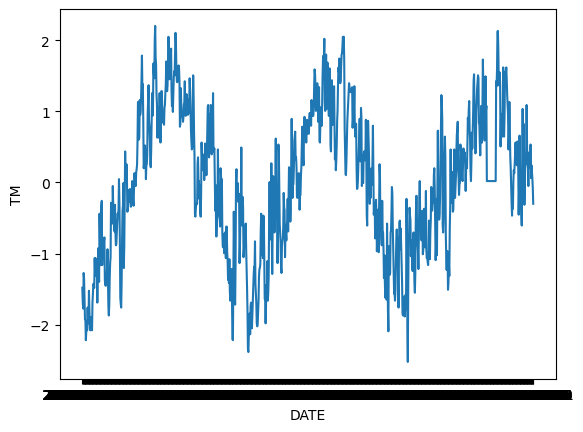

In [7]:
sns.lineplot(data=df_standardise, x=df_standardise.index, y=df_standardise.TM)

### b) Test proprement dit

In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Supposons que df_standardise est déjà défini et contient la colonne 'TM'
tm = df_standardise['TM']

import pandas as pd
import statsmodels.api as sm

def regresser_modele_3(series):
    """
    Ajuste le modèle 3′ : ∆Xt = ϕXt−1 + λ + δt + εt.
    
    Arguments :
    - series : pd.Series, la série temporelle à modéliser.
    
    Retourne :
    - Résultats du modèle ajusté.
    """
    try:
        # Calculer ∆Xt (différences premières de la série)
        delta_Xt = series.diff().dropna()
        
        # Construire les variables explicatives :
        # - Xt-1 : Décalage de la série originale
        # - tendance : série croissante 0, 1, 2, ...
        Xt_minus_1 = series.shift(1).dropna()
        tendance = range(len(delta_Xt))
        
        # Créer le DataFrame des variables explicatives
        X = pd.DataFrame({"Xt-1": Xt_minus_1, "tendance": tendance})
        X = sm.add_constant(X)  # Ajouter la constante λ
        
        # Ajuster le modèle avec OLS (moindres carrés ordinaires)
        model = sm.OLS(delta_Xt, X).fit()
        
        # Afficher le résumé des résultats
        print(model.summary())
        return model
    except Exception as e:
        print(f"Erreur lors de la régression : {e}")
        return None

# Ajuster le modèle 3′
resultat = regresser_modele_3(tm)



                            OLS Regression Results                            
Dep. Variable:                     TM   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     18.01
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           2.05e-08
Time:                        20:25:02   Log-Likelihood:                -395.16
No. Observations:                1021   AIC:                             796.3
Df Residuals:                    1018   BIC:                             811.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0099      0.022     -0.442      0.6

On constate que la tendance n'est pas significative. Alors, nous allons passer au modèle 2 avec constante uniquement.

In [9]:
import pandas as pd
import statsmodels.api as sm

def regresser_modele_2(series):
    """
    Ajuste le modèle 2′ : ∆Xt = ϕXt−1 + λ + εt.
    
    Arguments :
    - series : pd.Series, la série temporelle à modéliser.
    
    Retourne :
    - Résultats du modèle ajusté.
    """
    try:
        # Calculer ∆Xt (différences premières de la série)
        delta_Xt = series.diff().dropna()
        
        # Construire les variables explicatives :
        # - Xt-1 : Décalage de la série originale
        Xt_minus_1 = series.shift(1).dropna()
        
        # Créer le DataFrame des variables explicatives
        X = pd.DataFrame({"Xt-1": Xt_minus_1})
        X = sm.add_constant(X)  # Ajouter la constante λ
        
        # Ajuster le modèle avec OLS (moindres carrés ordinaires)
        model = sm.OLS(delta_Xt, X).fit()
        
        # Afficher le résumé des résultats
        print(model.summary())
        return model
    except Exception as e:
        print(f"Erreur lors de la régression : {e}")
        return None

# Exemple d'utilisation
import numpy as np

# Ajuster le modèle 2′
resultat = regresser_modele_2(tm)


                            OLS Regression Results                            
Dep. Variable:                     TM   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     35.73
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           3.13e-09
Time:                        20:44:32   Log-Likelihood:                -395.32
No. Observations:                1021   AIC:                             794.6
Df Residuals:                    1019   BIC:                             804.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012      0.011      0.105      0.9

On constate que la constante n'est pas significative. Alors, nous allons passer au modèle 2 sans constante.

In [11]:
import pandas as pd
import statsmodels.api as sm

def regresser_modele_1(series):
    """
    Ajuste le modèle 1′ : ∆Xt = ϕXt−1 + εt (sans constante).
    
    Arguments :
    - series : pd.Series, la série temporelle à modéliser.
    
    Retourne :
    - Résultats du modèle ajusté.
    """
    try:
        # Calculer ∆Xt (différences premières de la série)
        delta_Xt = series.diff().dropna()
        
        # Construire les variables explicatives :
        # - Xt-1 : Décalage de la série originale
        Xt_minus_1 = series.shift(1).dropna()
        
        # Construire le DataFrame sans constante
        X = pd.DataFrame({"Xt-1": Xt_minus_1})
        X = X.loc[delta_Xt.index]  # Aligner les index
        
        # Ajuster le modèle sans constante avec OLS
        model = sm.OLS(delta_Xt, X, hasconst=False).fit()
        
        # Afficher le résumé des résultats
        print(model.summary())
        return model
    except Exception as e:
        print(f"Erreur lors de la régression : {e}")
        return None

# Exemple d'utilisation
import numpy as np

# Ajuster le modèle 1′
resultat = regresser_modele_1(tm)



                                 OLS Regression Results                                
Dep. Variable:                     TM   R-squared (uncentered):                   0.034
Model:                            OLS   Adj. R-squared (uncentered):              0.033
Method:                 Least Squares   F-statistic:                              35.76
Date:                Wed, 25 Dec 2024   Prob (F-statistic):                    3.08e-09
Time:                        20:52:51   Log-Likelihood:                         -395.33
No. Observations:                1021   AIC:                                      792.7
Df Residuals:                    1020   BIC:                                      797.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

. Conclusion
P-valeur significative : p value < 0.05, nous rejetons H0
​
 . Le coefficient 𝜙 est négatif et significatif (𝜙 = −0.0667).

Série stationnaire :
Ces résultats indiquent que la série est stationnaire, car il n’y a pas de racine unitaire.

### Test complémentaire

In [18]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss


# Test de Dickey-Fuller augmenté (ADF)
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    print("Test Dickey-Fuller Augmenté (ADF):")
    print(f"Statistique de test : {result[0]:.4f}")
    print(f"p-value : {result[1]:.4f}")
    print(f"Valeurs critiques : {result[4]}")
    if result[1] < 0.05:
        print("=> La série est stationnaire (on rejette l'hypothèse nulle).")
    else:
        print("=> La série n'est pas stationnaire (on ne rejette pas l'hypothèse nulle).")

# Test KPSS
def kpss_test(series):
    result = kpss(series, regression='c')
    print("\nTest KPSS:")
    print(f"Statistique de test : {result[0]:.4f}")
    print(f"p-value : {result[1]:.4f}")
    print(f"Valeurs critiques : {result[3]}")
    if result[1] > 0.05:
        print("=> La série est stationnaire (on ne rejette pas l'hypothèse nulle).")
    else:
        print("=> La série n'est pas stationnaire (on rejette l'hypothèse nulle).")

# Exécution des tests
adf_test(df_standardise["TM"])
kpss_test(df_standardise["TM"])

Test Dickey-Fuller Augmenté (ADF):
Statistique de test : -3.5260
p-value : 0.0073
Valeurs critiques : {'1%': np.float64(-3.4368090295897624), '5%': np.float64(-2.864391734279673), '10%': np.float64(-2.5682883916134824)}
=> La série est stationnaire (on rejette l'hypothèse nulle).

Test KPSS:
Statistique de test : 0.2457
p-value : 0.1000
Valeurs critiques : {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
=> La série est stationnaire (on ne rejette pas l'hypothèse nulle).


/tmp/ipykernel_112267/2478914011.py:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(series, regression='c')


### RAeprésentation de l'ACF et PACF

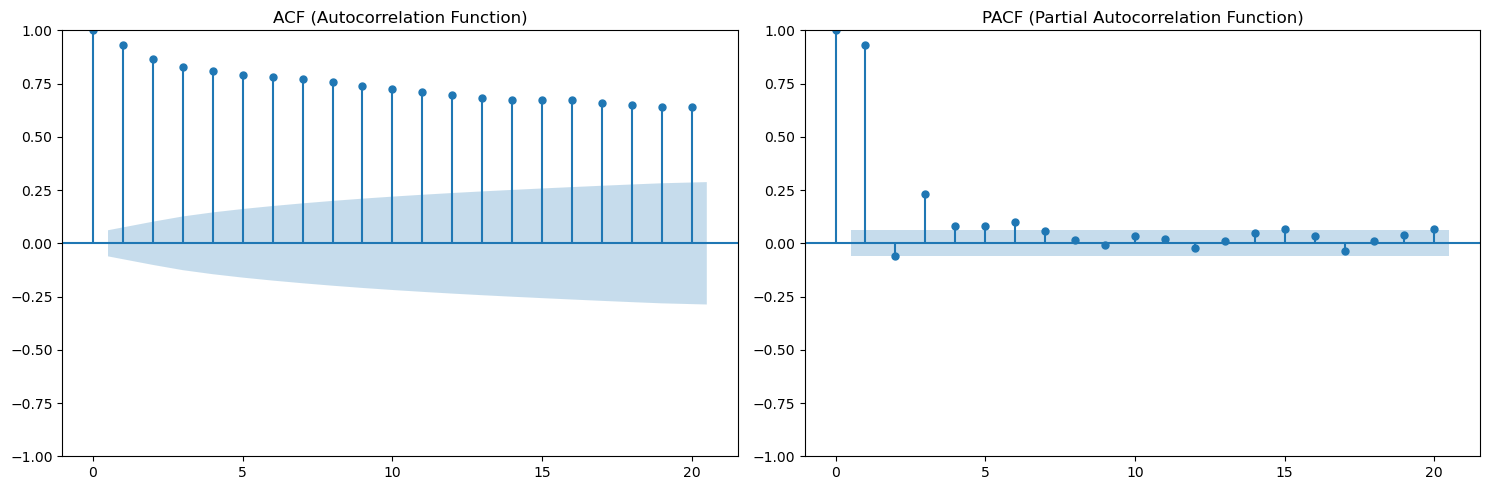

In [12]:
# Tracer l'ACF et le PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fonction d'autocorrélation (ACF)
plot_acf(df_standardise["TM"], lags=20, ax=axes[0])
axes[0].set_title('ACF (Autocorrelation Function)')

# Fonction d'autocorrélation partielle (PACF)
plot_pacf(df_standardise["TM"], lags=20, ax=axes[1], method='ywm')
axes[1].set_title('PACF (Partial Autocorrelation Function)')

plt.tight_layout()
plt.show()

### ACF et PACF en appliquant le modèle 1

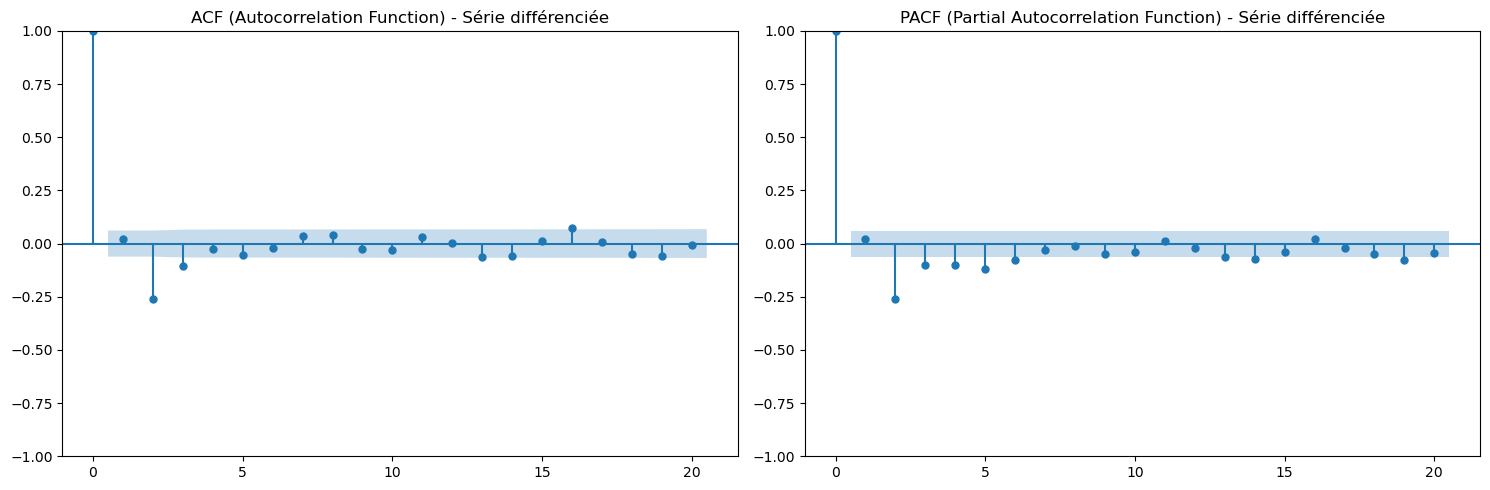

In [13]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculer la série différenciée (Delta X_t)
tm_diff = df_standardise["TM"].diff().dropna()  # Différence première

# Tracer l'ACF et le PACF de la série différenciée
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fonction d'autocorrélation (ACF)
plot_acf(tm_diff, lags=20, ax=axes[0])
axes[0].set_title('ACF (Autocorrelation Function) - Série différenciée')

# Fonction d'autocorrélation partielle (PACF)
plot_pacf(tm_diff, lags=20, ax=axes[1], method='ywm')  # "ywm" est robuste
axes[1].set_title('PACF (Partial Autocorrelation Function) - Série différenciée')

plt.tight_layout()
plt.show()
